#### Analysing and Plotting Household data Uttar Pradesh and Maharashtra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### Parsing household data and creating a merged dataframe of level 1 and level 3

In [2]:
colspecs = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,41),(41,42),(42,43),(43,44),(56,62),(62,68),(68,71),(126,129),(129,139)]
dfHH1 = pd.read_fwf('TUS106_L01.txt', colspecs)
columns = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","InformantSI no","Response code", "Survey code","Casualty code","Date of Survey","Date of despatch", "Time to canvass","NSC", "Multiplier"]
dfHH1.columns =  columns

colspecs = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,42),(44,46),(46,56),(56,66),(66,76),(76,86),(86,96),(96,98),(98,99),(99,100),(100,101),(101,102),(102,103),(126,129),(129,139)]
dfHH3 = pd.read_fwf('TUS106_L03.txt', colspecs)
columns = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "HH Size", "Land Own", "Monthly HH expenses A", "Impute Home grown B", "Wages in Kind C", "HH durable spent D", "Usual monthly expenses - ABCD", "Cooking energy", "lighting energy", "Washing clothes", "Sweeping floor", "Dwelling structure", "Care giver", "NSC", "Multiplier"]
dfHH3.columns =  columns


In [3]:
print(dfHH1.shape)
print(dfHH3.shape)

(138798, 16)
(138798, 22)


In [4]:
dfHH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 9)]
dfHH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 9)]

print(dfHH1.shape)
print(dfHH3.shape)

(5539, 16)
(5539, 22)


In [5]:
HH_merge = pd.concat([dfHH1, dfHH3], axis=1)
HH_merge.shape

(5539, 38)

In [6]:
HH_merge.isna().sum()

FSU                                 0
Sector                              0
State                               0
District                            0
Stratum                             0
Sub-stratum                         0
Sample HHID                         0
InformantSI no                      4
Response code                       0
Survey code                         0
Casualty code                    5095
Date of Survey                     34
Date of despatch                  564
Time to canvass                   122
NSC                                 0
Multiplier                          0
FSU                                 0
Sector                              0
State                               0
District                            0
Stratum                             0
Sub-stratum                         0
Sample HHID                         0
HH Size                             0
Land Own                           89
Monthly HH expenses A               0
Impute Home 

In [9]:
HH_inhabitated = HH_merge[HH_merge['Survey code'] == 1 ]

In [10]:
HH_inhabitated.shape

(5095, 38)

In [11]:
HH_inhabitated.columns

Index(['FSU', 'Sector', 'State', 'District', 'Stratum', 'Sub-stratum',
       'Sample HHID', 'InformantSI no', 'Response code', 'Survey code',
       'Casualty code', 'Date of Survey', 'Date of despatch',
       'Time to canvass', 'NSC', 'Multiplier', 'FSU', 'Sector', 'State',
       'District', 'Stratum', 'Sub-stratum', 'Sample HHID', 'HH Size',
       'Land Own', 'Monthly HH expenses A', 'Impute Home grown B',
       'Wages in Kind C', 'HH durable spent D',
       'Usual monthly expenses - ABCD', 'Cooking energy', 'lighting energy',
       'Washing clothes', 'Sweeping floor', 'Dwelling structure', 'Care giver',
       'NSC', 'Multiplier'],
      dtype='object')

<AxesSubplot:xlabel='HH Size'>

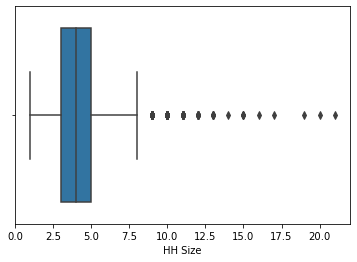

In [12]:
# Plot boxplot to visualise univariate outlier

sns.boxplot(x=HH_inhabitated['HH Size'])

<AxesSubplot:xlabel='Land Own'>

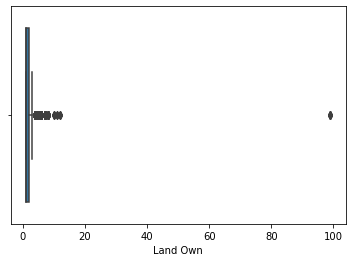

In [13]:
sns.boxplot(x=HH_inhabitated['Land Own'])

<AxesSubplot:xlabel='Land Own'>

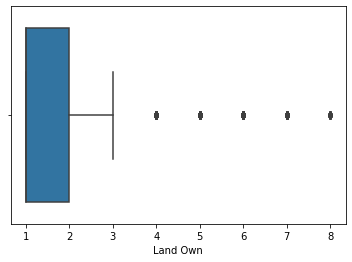

In [29]:
HH_LandOwn = HH_inhabitated[HH_inhabitated['Land Own'] <10]
sns.boxplot(x=HH_LandOwn['Land Own'])

<AxesSubplot:xlabel='Monthly HH expenses A'>

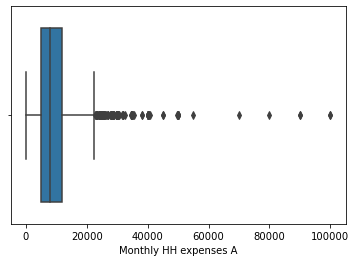

In [14]:
sns.boxplot(x=HH_inhabitated['Monthly HH expenses A'])

<AxesSubplot:xlabel='Impute Home grown B'>

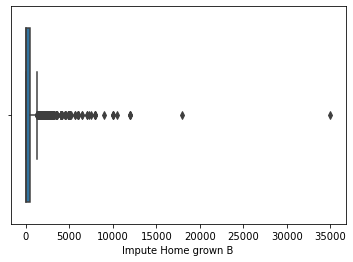

In [15]:
sns.boxplot(x=HH_inhabitated['Impute Home grown B'])

<AxesSubplot:xlabel='Wages in Kind C'>

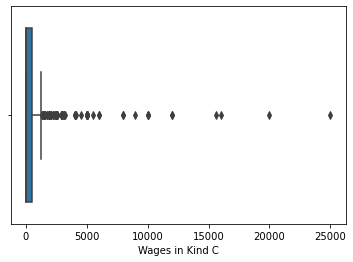

In [16]:
sns.boxplot(x=HH_inhabitated['Wages in Kind C'])

<AxesSubplot:xlabel='HH durable spent D'>

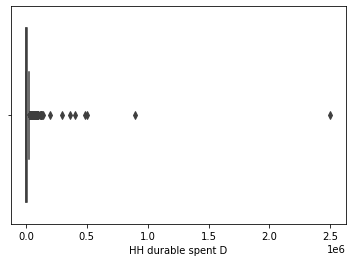

In [17]:
sns.boxplot(x=HH_inhabitated['HH durable spent D'])

<AxesSubplot:xlabel='Usual monthly expenses - ABCD'>

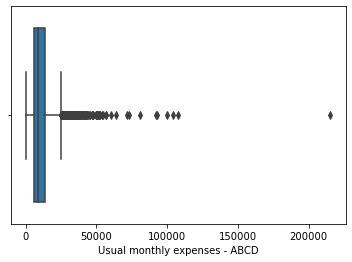

In [18]:
sns.boxplot(x=HH_inhabitated['Usual monthly expenses - ABCD'])

In [19]:

#Detecting outiers using IQR outlier detection
# IQR outlier detection
data = HH_inhabitated['Usual monthly expenses - ABCD']
q1,q3 = np.percentile(data,[25,75])
interQuartileRange = q3 - q1
lowerBound = q1 - (interQuartileRange*1.5)
upperBound = q3 + (interQuartileRange*1.5)
outlierIndices = np.where((data > upperBound)|(data < lowerBound))
outlierIndices

(array([  22,   81,   84,   89,   99,  120,  125,  126,  130,  142,  168,
         222,  251,  253,  376,  377,  388,  420,  451,  502,  504,  514,
         524,  629,  632,  637,  641,  649,  670,  682,  692,  693,  696,
         697,  750,  751,  785,  800,  801,  808,  871,  872,  876,  880,
         890,  922,  932,  934,  936,  941,  991, 1048, 1052, 1053, 1171,
        1172, 1229, 1235, 1236, 1239, 1248, 1330, 1363, 1469, 1530, 1554,
        1688, 1701, 1734, 1736, 1796, 1797, 1799, 1800, 1864, 1865, 1866,
        1867, 1869, 1870, 1872, 1889, 1890, 1899, 2056, 2057, 2084, 2097,
        2109, 2137, 2177, 2250, 2252, 2277, 2278, 2280, 2281, 2283, 2285,
        2286, 2287, 2289, 2295, 2316, 2342, 2355, 2359, 2386, 2393, 2394,
        2397, 2410, 2412, 2415, 2446, 2460, 2517, 2595, 2601, 2681, 2699,
        2727, 2728, 2729, 2731, 2732, 2733, 2748, 2751, 2756, 2757, 2784,
        2787, 2792, 2793, 2797, 2886, 2888, 2914, 2956, 2976, 2979, 2981,
        2984, 2999, 3004, 3011, 3013, 

In [23]:
#Detecting outiers using IQR outlier detection
# IQR outlier detection
data = HH_inhabited['HH Size']
q1,q3 = np.percentile(data,[25,75])
interQuartileRange = q3 - q1
lowerbound = q1 - (interQuartileRange*1.5)
upperbound = q3 + (interQuartileRange*1.5)
#outlierIndices2 = np.where((data > upperBound)|(data < lowerBound))
#print(outlierIndices)
#len(outlierIndices2)
#outlierIndices2
HH_new = HH_inhabitated.drop(HH_inhabitated[ (HH_inhabitated['HH Size'] > upperbound) | (HH_inhabitated['HH Size'] < lowerbound) ].index , inplace=True)

In [21]:
HH_new

In [ ]:
random_data = HH_inhabited['HH Size']

q3, q1 = np.percentile(random_data, [75, 25])
print(q3, q1)
print(len(random_data))
random_data = random_data[random_data < q3]
random_data = random_data[random_data > q1]
print(len(random_data))



In [ ]:
# Dropping outliers
Data2 = HH_inhabited['HH size'].drop(random_data)
print(Data2)
# Reset dataset
#Data2_reset = Data2.reset_index(drop=True)
#print(Data2_reset)

In [ ]:

random_data = HH_inhabited['Monthly HH expenses A']
q3, q1 = np.percentile(random_data, [75, 25])
print(q3, q1)
print(len(random_data))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

random_data1 = random_data[random_data < upper_bound]
random_data2 = random_data[random_data > lower_bound]
print(len(random_data1))
print(len(random_data1))

In [ ]:
plt.hist(random_data)

In [ ]:
HH_inhabited['Usual monthly expenses - ABCD'].plot(kind='line')